In [11]:
import pandas as pd
import scipy.stats as stats
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [12]:
bankdf = pd.read_csv("new_train.csv")
bankdf.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [13]:
#Remove rows with null values
bankdf = bankdf.loc[bankdf['job']   != 'unknown']
bankdf = bankdf.loc[bankdf['marital']   != 'unknown']
bankdf = bankdf.loc[bankdf['education']   != 'unknown']
bankdf = bankdf.loc[bankdf['default']   != 'unknown']
bankdf = bankdf.loc[bankdf['housing']   != 'unknown']
bankdf = bankdf.loc[bankdf['loan']   != 'unknown']
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no


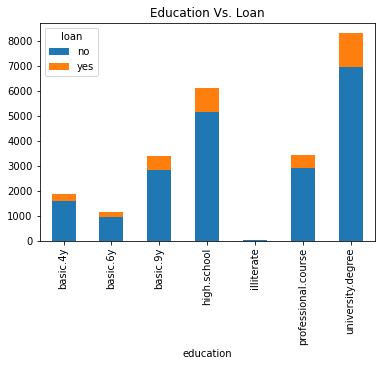

In [14]:
#Plot bar chart with the X-Axis as Education and the Y-Axis as where a loan is taken
# fig=px.bar(bankdf,x="education",y="loan",color="education")
# fig.update_traces(dict(marker_line_width=0))
# fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})

# fig.show()
ax = bankdf.groupby(['education'])['loan'].value_counts().unstack().plot(kind='bar',stacked = True, title="Education Vs. Loan")


In [15]:
bankdf.loan=bankdf.loan.eq('yes').mul(1)
label_encoder = LabelEncoder()
x = bankdf["education"]
y = label_encoder.fit_transform(x)
bankdf.education=y
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1,37,entrepreneur,married,6,no,no,0,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,0,no,no,0,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,6,no,yes,0,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,6,no,no,0,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,6,no,no,0,cellular,aug,wed,256,2,999,0,nonexistent,no


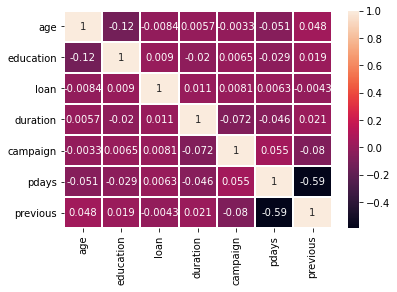

In [16]:
ax=sns.heatmap(bankdf.corr(),annot=True,lw=1)
